The goal of this research page is to try to see if the contructor has any effect on winning

We can achieve this by comparing categorical variable with categorical variable using the chi quared independece test

In [48]:
import pandas as pd
import scipy.stats as stats

In [49]:
df = pd.read_csv('races.csv')
df = df[['raceId', 'year', 'circuitId', 'name' ,'date']]
df = df.loc[df["year"] >= 2018]



df_results = pd.read_csv('results.csv')


df_results = df_results[['raceId', 'driverId', 'position', 'constructorId']].reset_index(drop=True)
df_results = df_results.rename(columns={"position":"result"})
df = df.merge(df_results, how="inner", on="raceId")
df["result"] = df["result"].astype(str)

In [50]:
df.head()

,raceId,year,circuitId,name,date,driverId,result,constructorId
0,989,2018,1,Australian Grand Prix,2018-03-25,20,1,6
1,989,2018,1,Australian Grand Prix,2018-03-25,1,2,131
2,989,2018,1,Australian Grand Prix,2018-03-25,8,3,6
3,989,2018,1,Australian Grand Prix,2018-03-25,817,4,9
4,989,2018,1,Australian Grand Prix,2018-03-25,4,5,1


In [51]:
driver = pd.read_csv("drivers.csv")

constructor = pd.read_csv("constructors.csv")
constructor = constructor[["constructorId", "name"]]
constructor = constructor.set_index('constructorId').to_dict()["name"]
df["constructor_name"] = df["constructorId"].apply(lambda x: constructor[x])

In [52]:
sample = df.sample(n=100)
sample.head()

,raceId,year,circuitId,name,date,driverId,result,constructorId,constructor_name
1812,1083,2022,9,British Grand Prix,2022-07-03,817,13,1,McLaren
2176,1104,2023,6,Monaco Grand Prix,2023-05-28,807,17,210,Haas F1 Team
1951,1091,2022,15,Singapore Grand Prix,2022-10-02,825,12,210,Haas F1 Team
2223,1107,2023,70,Austrian Grand Prix,2023-07-02,846,4,1,McLaren
636,1020,2019,10,German Grand Prix,2019-07-28,844,\N,6,Ferrari


In [53]:
sample["constructor_name"].value_counts()

Mercedes        13
Haas F1 Team    12
Red Bull        12
Ferrari         11
Williams        10
McLaren          9
Alfa Romeo       8
Aston Martin     8
Toro Rosso       5
Renault          5
AlphaTauri       3
Racing Point     2
Sauber           1
Force India      1
Name: constructor_name, dtype: int64

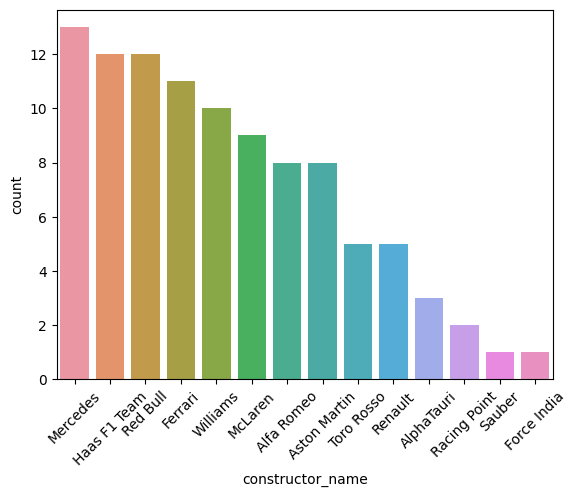

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=sample, x="constructor_name", order=sample["constructor_name"].value_counts().index)
plt.xticks(rotation=45)
plt.show()

In [55]:

cross_table = pd.crosstab(sample["result"], sample["constructor_name"])
cross_table

constructor_name,Alfa Romeo,AlphaTauri,Aston Martin,Ferrari,Force India,Haas F1 Team,McLaren,Mercedes,Racing Point,Red Bull,Renault,Sauber,Toro Rosso,Williams
result,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,4,0,3,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,0,1,1,0
11,3,0,3,0,1,0,0,1,0,0,0,0,0,0
12,0,1,1,0,0,1,0,0,0,0,0,0,0,1
13,0,0,2,0,0,0,2,0,0,0,1,0,0,1
14,1,1,0,0,0,1,1,0,0,0,0,0,1,2
15,0,0,1,0,0,0,0,1,0,0,0,0,0,0
16,1,0,0,0,0,1,0,0,0,0,0,0,0,1
17,0,0,0,0,0,4,0,0,0,0,0,0,0,2


In [ ]:

sample = sample[~(sample["result"] == r"\N")]

Null hypothesis: The contructor and the result of the race have no relationship
Alternative hypothesis: The construtor and the result of the race do have relationship

In [56]:
import scipy.stats as stats
test = stats.chi2_contingency(cross_table)
print(f"Chi statistics: {test[0]} with p-value {test[1]}")

Chi statistics: 310.6395918895919 with p-value 0.0037010658089413457


If we're using a level of significance of 5%, then we must reject the null hypothesis. We can conclude, there is no relationship between the result of the race and the constructor.

Lets try winner instead of position.

In [59]:
def winner(x):
    if x == 1:
        return 1
    else:
        return 0
sample["Winner?"] = ''
#Need to drop values
sample = sample[~(sample["result"] == r"\N")]
sample["Winner?"] = sample["result"].astype(int).apply(lambda x: winner(x))
sample["Winner?"] = sample["Winner?"].astype(str)


Performing the Chi Square Test of independence between Constructor and Winner?

Null hypothesis: The contructor and the winner of the race have no relationship
Alternative hypothesis: The construtor and the winner of the race are related

In [60]:

cross_table = pd.crosstab(sample["Winner?"], sample["constructor_name"])
test = stats.chi2_contingency(cross_table)
print(f"Chi statistics: {test[0]} with p-value {test[1]}")

Chi statistics: 19.93971306471306 with p-value 0.09672372719583795


At a significance level of .05, we fail to reject the null hypothesis. We can conclude there is a relationship between the constructor and the winner of the race.